## Homework 2

## <em>Intro to Statistics</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Inferring a Decay Constant

Unstable particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$. Decay events can be observed only if they occur in a window extending from $x$ = 1cm to $x$ = 20cm. $N$ decays are observed at locations {$x_1$, ... , $x_N$}. What is $\lambda$? <br>
![alt text](decay.png "Title")

Given $\lambda$, the probability of observing a particle at a distance $x$ is:<br>

\begin{equation}
P(x\ |\ \lambda) =  
\begin{cases}
\frac{1}{\lambda}e^{-x/\lambda}\big/\ Z(\lambda)\ \ \ \ \ \ a < x < b \\
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{otherwise}
\end{cases}
\end{equation}

where
$$ Z(\lambda) = \int_a^b dx \frac{1}{\lambda}e^{-x/\lambda} = \big( e^{-a/\lambda} - e^{-b/\lambda} \big). $$
Here, $a = 1,\ b = 20$.
<br> <br>
<span style="color:blue"><i> 1. Write a function for $Z(\lambda)$. Then, use it to write another function for $P(x|\lambda)$. </i></span> <br>
<br>
Check if your function can return a correct value if either $x$ or $L$ is a 2D array. Say $x$ is a scalar, and $L$ is a vector with $N$ elements. If you calculate the product $x*L$, the dimension of $x$ is stretched to $N \times 1$ in order to match that of $L$ ([broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)). If $x$ and $L$ are both vectors, then they must have the same dimensions to perform arithmetic operations on them ($x*L$, $x$+$L$, $x$/$L$, etc).

In [2]:
def Z(L, a, b):
    '''Normalizing constant function for a characteristic length L, assuming that the data are
    truncated between x = a and x = b.
    '''
    return np.exp(-a/L) - np.exp(-b/L)

# Z = quad(lambda y, L: 1./L*exp(-y/L), a, b, args = (L, ))[0] will return the same value.

def pdf_decay(x, L, a, b):
    'Probability of one data point, given L'
    return 1./L*np.exp(-x/L)/Z(L, a, b)

<span style="color:blue"> <i> 2. Plot $P(x|\lambda)$ as a function of $x$ for $\lambda = 2, 5, 10$. Make sure to label each plot. </i></span>

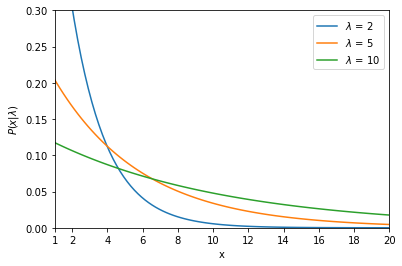

In [308]:
# Create arrays for x and L.
x = np.linspace(1e-1, 20, 100)
L = np.array([2, 5, 10])

# Plot the probability desity as a function of x for each lambda.
# Hint: You can use a for-loop and make a plot for each element of an array L. (But you don't
#have to do it in this way.)
# Hint2: You should label each plot. To do this in a for-loop, you should remember that you can
#insert values into a string with the placeholder % (https://docs.python.org/2.4/lib/typesseq-strings.html).

for i in range(len(L)):
    plt.plot(x, pdf_decay(x, L[i], 1, 20), label = '$\lambda$ = %d' %L[i])

plt.xlim(1, 20)
plt.xticks(np.append(np.array([1]), np.arange(2, 20+1, 2)))
plt.ylim(0, 0.3)
plt.xlabel('x')
plt.ylabel('$P(x|\lambda)$')
plt.legend()
plt.show()

<span style="color:blue"> <i> 3. Plot $P(x|\lambda)$ as a function of $\lambda$ for $\lambda = 3, 5, 12$. (This function is known as the <b>likelihood</b> of $\lambda$) Make sure to label each plot. Note that a peak emerges in each plot. </i></span>

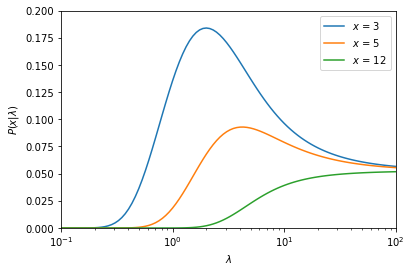

In [309]:
# Create arrays for x and L.
x = np.array([3, 5, 12])
L = np.logspace(-1, 2, 100)

# Plot the probability desity as a function of L for each x.
for i in range(len(x)):
    plt.semilogx(L, pdf_decay(x[i], L, 1, 20), label = '$x$ = %d' %x[i])

plt.xlim(1.e-1, 1.e2)
plt.ylim(0, 0.2)
plt.xlabel('$\lambda$')
plt.ylabel('$P(x|\lambda)$')
plt.legend()
plt.show()

<span style="color:blue"> <i> 4. Plot $P(x|\lambda)$ as a function of $x$ and $\lambda$. Create a surface plot.  </i></span>

In [3]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

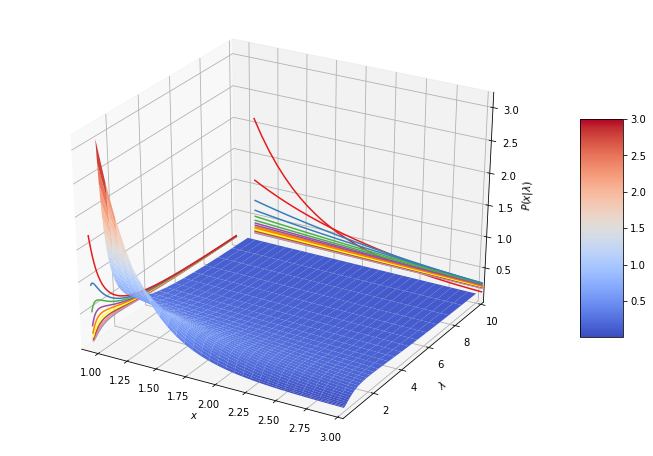

In [4]:
# Create arrays for x and L. These define your "x" and "y" coordinates.
x = np.linspace(1, 3, 30)
L = np.logspace(-0.5, 1, 30)
# Create coordinate matrices from coordinate vectors.
x, L = np.meshgrid(x, L)

# Evaluate probability densities at all (x,y) coordinates. This is your "z" coordinate.
z = pdf_decay(x, L, 1, 20)

# Make plot
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, L, z, vmax=3, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Add contour plots
cset = ax.contour(x, L, pdf_decay(x, L, 1, 20), 10, zdir='x', offset=0.9, cmap=cm.Set1)
cset = ax.contour(x, L, pdf_decay(x, L, 1, 20), 20, zdir='y', offset=10.5, cmap=cm.Set1)

ax.set_xlim(0.9, 3)
ax.set_ylim(1.e-1, 1.e1)

ax.set_xlabel('$x$')
ax.set_ylabel('$\lambda$')
ax.set_zlabel('$P(x|\lambda)$')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In the above figure, two contour plots (constant $x$ and $y$ slices) are also included. Compare them to the figures you created in part 2 and 3. They are the same; they correspond to vertical sections through surface.<br>

Now write Bayes' theorem:<br>

\begin{align}
P(\lambda\ |\ \{x_1, ..., x_N\}) & = \frac{P(\{x\}|\lambda)P(\lambda)}{P(\{x\})} \\
 & \propto \frac{1}{(\lambda Z(\lambda))^N}\ \mathrm{exp} \big( -\sum_1^N x_n/\lambda \big) P(\lambda)
\end{align}
<br>
<span style="color:blue"> <i> 5. Define the likelihood function $P(\{x\}|\lambda)$ and plot $P(\{x \} = \{1.5, 2, 3, 4, 5, 12\}|\lambda)$ as a function of $\lambda$. Estimate the peak posterior value of $\lambda$ and the error on $\lambda$ by fitting to a gaussian at the peak.  </i></span>

In [374]:
def likelihoodP(x, L):
    'The likelihood function given a dataset (x array) and a characteristic length L'
    N = len(x)
    return 1./(L*Z(L,1,20))**N*np.exp(-sum(x)/L)

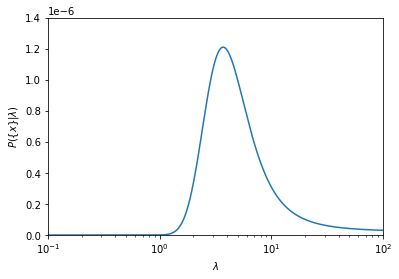

In [466]:
# Create an array for L. Assume that it is evenly spaced numbers over the interval (1e-1, 1e2).
L = np.logspace(-1, 2, 1000)
# Create an array for x.
x = np.array([1.5, 2, 3, 4, 5, 12])

# Evaluate the likelihood function and plot it as a function of L
P = likelihoodP(x, L)

plt.semilogx(L, likelihoodP(x, L))
plt.xlim(1.e-1,1.e+2)
plt.ylim(0, 1.4e-6)
plt.xlabel('$\lambda$')
plt.ylabel('$P(\{x\}|\lambda)$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

The peak posterior value of the characteristic length is =  3.6946012052


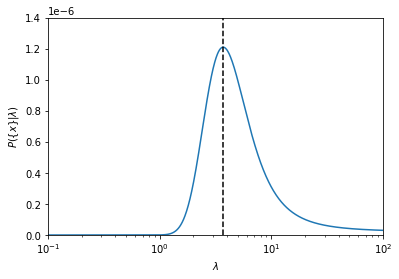

In [469]:
# Estimate the peak posterior value of L
max_L = L[np.argmax(P)]

print("The peak posterior value of the characteristic length is = ", max_L)

plt.semilogx(L, likelihoodP(x, L))
plt.semilogx(max_L*np.ones(2), np.array([0, 1]), 'k--')

plt.xlim(1.e-1,1.e+2)
plt.ylim(0, 1.4e-6)
plt.xlabel('$\lambda$')
plt.ylabel('$P(\{x\}|\lambda)$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

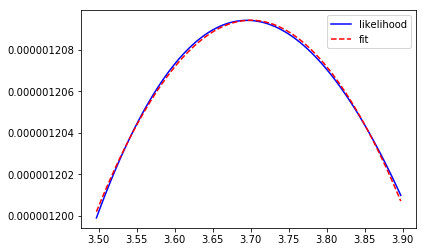

The error on L is estimated to be =  1.64093678891


In [478]:
# Estimate the error on L  by fitting to a gaussian at the peak
# Import packages for curve fitting
from scipy.optimize import curve_fit

# Create an array of L near L_max
L = np.linspace(max_ind-0.2, max_ind+0.2, 100)
x = np.array([1.5, 2, 3, 4, 5, 12])

# Define Gaussian function
def gaussian(x, Amp, mu, sig):
    return Amp*np.exp(-((x-mu)**2)/(2*sig**2))

# Fit a Gaussian function to a data
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
popt, pcov = curve_fit(gaussian, L, likelihoodP(x, L))

plt.plot(L, likelihoodP(x, L), 'b-', label = 'likelihood')
plt.plot(L, gaussian(L, *popt), 'r--', label='fit')
plt.legend()
plt.show()

Error = popt[2]
print("The error on L is estimated to be = ", Error)

***

#### Problem 2 - Biased Coin

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair? <br>
<br>
We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. <br>
<br>
First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$. <br>
<br>
Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. <br>
<br>
Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$
<br>
Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html) <br>
<br>
The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$ <br> <br>
$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$
<br>
Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$
<br>
<span style="color:blue"> <i> 1. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor?</i></span> <br>
<br>
(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:
$$ log(xy/z) = log(x)+log(y)-log(z) $$ <br>
Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:
$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$
<br>
You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)

In [1]:
F = 256; F_H = 142; F_T = F - F_H

from math import factorial, log, exp, lgamma

# Using factorial
Likelihood_H1 = factorial(F_H)*factorial(F_T)/factorial(F_H+F_T+1)
Likelihood_H0 = (1./2.)**F

ratio = Likelihood_H1/Likelihood_H0

# Using logthm of the gamma function

log_Likelihood_H1 = lgamma(F_H+1)+lgamma(F_T+1)-lgamma(F_H+F_T+2)
Likelihood_H1 = exp(log_Likelihood_H1)
Likelihood_H0 = (1./2.)**F

ratio = Likelihood_H1/Likelihood_H0

print("The likelihood ratio is = ", ratio)
print("The data give evidence in favor of H0")

The likelihood ratio is =  0.3600892135186811
The data give evidence in favor of H0


Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: <br>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
<span style="color:blue"><i> 2. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. </i></span><br>


<span style="color:blue"> <i> Answer: </i></span>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2}p^{\alpha-1}(1-p)^{\alpha-1}$$ <br>
Then,
\begin{align}
P(D|p, \mathcal{H}_1, \alpha) & = \int dp\ P(D|p,\mathcal{H}_1) P(p|\mathcal{H}_1,\alpha) \\
& = \int_0^1 p^{F_H} (1-p)^{F_T} \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2}p^{\alpha-1}(1-p)^{\alpha-1} \\
& = \int_0^1 p^{F_H+\alpha-1} (1-p)^{F_T+\alpha-1} \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2} \\
& = \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F_H+F_T+2\alpha)} \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2}
\end{align}
Therefore,
$$ \frac{P(D|p, \mathcal{H}_1, \alpha)}{P(D|p, \mathcal{H}_0)} = \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F_H+F_T+2\alpha)} \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2}2^F $$

In [4]:
alpha = np.array([3.7e-1, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096])

def likelihood_ratio(F_H, F_T, alpha):
    log_Likelihood_H1 = lgamma(F_H+alpha)+lgamma(F_T+alpha)+lgamma(2*alpha)-lgamma(F_H+F_T+2*alpha)-2*lgamma(alpha)
    Likelihood_H1 = exp(log_Likelihood_H1)
    Likelihood_H0 = (1./2.)**F
    return Likelihood_H1/Likelihood_H0

ratio = np.zeros_like(alpha)
for i in range(len(alpha)):
    ratio[i] = likelihood_ratio(F_H, F_T, alpha[i])

print("For alpha = ", alpha, ", the likelihood ratios are = ", np.around(ratio, decimals=2), "respectively.")

For alpha =  [  3.70000000e-01   1.00000000e+00   2.70000000e+00   7.40000000e+00
   2.00000000e+01   5.50000000e+01   1.48000000e+02   4.03000000e+02
   1.09600000e+03] , the likelihood ratios are =  [ 0.19  0.36  0.62  0.99  1.38  1.6   1.49  1.26  1.11] respectively.


<span style="color:blue"> <i> 3. Does the likelihood ratio for $\mathcal{H}_1$ over $\mathcal{H}_0$ increases as $\alpha$ increases? </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
Yes, but even the most favorable choice of $\alpha\ (\sim 50)$ can yield a likelihood ratio of only 1.4 to 1 in favor of $\mathcal{H}_1$.

<span style="color:blue"> <i> 4. Now, let $\mathcal{H}_1$ be the model in which the probability of getting heads is descrete at 142/256. What is the likelihood in this case? </i></span><br>

In [5]:
F = 256; F_H = 142; F_T = F - F_H

Likelihood_H1 = (F_H/F)**F_H*(F_T/F)**F_T
Likelihood_H0 = (1./2.)**F

ratio = Likelihood_H1/Likelihood_H0

print("The likelihood ratio is = ", ratio)

The likelihood ratio is =  4.638159986377322


<span style="color:blue"> <i> 5. Explain the above result. </i></span><br>

<span style="color:blue"><i> Answer: </i></span><br>
The probability of $\mathcal{H}_1$ is chosen to exactly match the data, so it is not surprising that the probability of the data given $\mathcal{H}_1$ is much larger. The data will pull our prior toward the one centered at F_H/F.

<span style="color:blue"><i> 6. Now let us test the null hypothesis. Assuming the central limit theorem, we model the binomial as a gaussian centered at $\mu = F/2$ and with the width given by $\sigma^2 = F*(p_{heads})*(p_{tails})$. (in this case, $p_{heads} = p_{heads} = 1/2$) </i></span><br>

In [7]:
# Define mu (mean) and sigma (variance)
mu = F/2
sigma = np.sqrt(F*(1/2)*(1-1/2))

# Calculate Z.
Z = abs(F_H-mu)/sigma

print("F_H is %.2f sigma away from the mean." %Z)

# Integrate a normal distribution from x=F_H to x=np.inf
def gaussian(x, mu, sigma):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

pvalue = quad(gaussian, F_H, np.inf, args = (mu, sigma, ))[0]*100

print("The p-value is %.2f percent." %pvalue)

F_H is 1.75 sigma away from the mean.
The p-value is 4.01 percent.


***

#### Problem 3 - Monty Hall

On a game show, a contestant is told the rules as follows: <br>
<br>
There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.<br>
<br>
At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.<br>
<br>
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 2, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 3, or (c) does it make no difference?

Let $\mathcal{H}_i$ denote the hypothesis that the prize is behind door $i$. We make the following assumptions: the three hypotheses $\mathcal{H}_1, \mathcal{H}_2, \mathcal{H}_3$ are equiprobable a <i>priori</i>, i.e., <br>
<br>
$$ P(\mathcal{H}_1) = P(\mathcal{H}_2) = P(\mathcal{H}_3) = \frac{1}{3} $$
<br>
The datum we receive, after choosing door 1, is one of $D$ = 3 and $D$ = 2 (meaning door 3 or 2 is opened, respectively).<br>
<span style="color:blue"> <i> 1. Find $P(D=2|\mathcal{H}_1), P(D=3|\mathcal{H}_1), P(D=2|\mathcal{H}_2), P(D=3|\mathcal{H}_2), P(D=2|\mathcal{H}_3), P(D=3|\mathcal{H}_3)$. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
\begin{align}
& P(D=2|\mathcal{H}_1) = 1/2, & P(D=3|\mathcal{H}_1) = 1/2 \\
& P(D=2|\mathcal{H}_2) = 0, & P(D=3|\mathcal{H}_2) = 1 \\
& P(D=2|\mathcal{H}_3) = 1, & P(D=3|\mathcal{H}_3) = 0 
\end{align}

Now, using Bayes’ theorem, we evaluate the posterior probabilities of the hypotheses:<br>
$$ P(\mathcal{H}_i|D=2) = \frac{P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D=2)} $$ <br>
<br>
<span style="color:blue"><i> 2. First, we need to calculate the normalizing constant (denominator). Find $P(D=2), P(D=3)$ </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
\begin{align}
& P(D=2) = \sum P(D=2|\mathcal{H}_i)P(\mathcal{H}_i) = 1/2 \\
& P(D=3) = \sum P(D=3|\mathcal{H}_i)P(\mathcal{H}_i) = 1/2
\end{align}

<span style="color:blue"> <i> 3. Evaluate the posterior probability and argue if the contestant should switch to door 3. <br>
<br>Alternatively, you can perform a thought experiment in which the game is played with 100 doors. The rules are now that the contestant chooses one door, then the game show host opens 98 doors in such a way as not to reveal the prize, leaving the contestant’s selected door and one other door closed. The contestant may now stick or switch. Where do you think the prize is? </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
\begin{align}
& P(\mathcal{H}_1|D=2) = \frac{P(D=2|\mathcal{H}_1)P(\mathcal{H}_1)}{P(D=2)} = \frac{(1/2)(1/3)}{(1/2)} = 1/3 \\
& P(\mathcal{H}_2|D=2) = \frac{P(D=2|\mathcal{H}_2)P(\mathcal{H}_2)}{P(D=2)} = \frac{(0)(1/3)}{(1/2)} = 0 \\
& P(\mathcal{H}_3|D=2) = \frac{P(D=2|\mathcal{H}_3)P(\mathcal{H}_3)}{P(D=2)} = \frac{(1)(1/3)}{(1/2)} = 2/3 \\
\end{align}
<br>
So the contestant should switch to door 3 in order to have the biggest chance of getting the prize.<br>
<br>
With 100 doors, things become more obvious and intuitive. The prize is much more likely to be behind one of the 99 doors you did not choose. If the host opens 98 of them, the prize is very likely to be behind the door you did not choose.

***
Imagine that the game happens again and just as the gameshow host is about to open one of the doors a violent earthquake rattles the building and one of the three doors flies open. It happens to be door 3, and it happens not to have the prize behind it. The contestant had initially chosen door 1.<br><br>
Repositioning his toupee, the host suggests, ‘OK, since you chose door 1 initially, door 3 is a valid door for me to open, according to the rules of the game; I’ll let door 3 stay open. Let’s carry on as if nothing happened.’
Should the contestant stick with door 1, or switch to door 2, or does it make no difference? Assume that the prize was placed randomly, that the gameshow host does not know where it is, and that the door flew open because its latch was broken by the earthquake.<br><br>
[A similar alternative scenario is a gameshow whose confused host forgets the rules, and where the prize is, and opens one of the unchosen doors at random. He opens door 3, and the prize is not revealed. Should the contestant choose what’s behind door 1 or door 2? Does the optimal decision for the contestant depend on the contestant’s beliefs about whether the gameshow host is confused or not?]

***
If door 3 is opened by an earthquake, the inference comes out differently – even though visually the scene looks the same. The nature of the data, and the probability of the data, are both now different. The possible data outcomes are, firstly, that any number of the doors might have opened. We could label the eight possible outcomes <b>d</b> = (0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),...,(1,1,1). <br><br>
Secondly, it might be that the prize is visible after the earthquake has opened one or more doors. So the data $D$ consists of the value of <b>d</b>, and a statement of whether the prize was revealed. It is hard to say what the probabilities of these outcomes are, since they depend on our beliefs about the reliability of the door latches and the properties of earthquakes, but it is possible to extract the desired posterior probability without naming the values of $P($<b>d</b>$|\mathcal{H}_i)$ for each <b>d</b>. <br><br>
All that matters are the relative values of the quantities $P(D|\mathcal{H}_1)$, $P(D|\mathcal{H}_2)$, $P(D|\mathcal{H}_3)$, for the value of $D$ that actually occurred. The value of $D$ that actually occurred is ‘<b>d</b> = (0, 0, 1), and no prize visible’.

<span style="color:blue"><i> 4. How does $P(D|\mathcal{H}_1)$ compare with $P(D|\mathcal{H}_2)$? What is $P(D|\mathcal{H}_3)$? Find $P(D|\mathcal{H}_1)/P(D)$ and $P(D|\mathcal{H}_2)/P(D)$. </i></span><br>

<span style="color:blue"><i> Answer: </i></span><br>
First, it is clear that $P(D|\mathcal{H}_3) = 0$, since the datum that no prize is visible is incompatible with $\mathcal{H}_3$. Assuming that earthquakes are not sensitive to decisions of game show contestants, these two quantities have to be equal, by symmetry. We don’t know how likely it is that door 3 falls off its hinges, but however likely it is, it’s just as likely to do so whether the prize is behind door 1 or door 2. <br><br>
$$ P(D) = P(D|\mathcal{H}_1)P(\mathcal{H}_1) + P(D|\mathcal{H}_2)P(\mathcal{H}_2) + P(D|\mathcal{H}_3)P(\mathcal{H}_3) = P(D|\mathcal{H}_1)(1/3) + P(D|\mathcal{H}_2)(1/3) + (0)(1/3) $$
and
$$ P(D|\mathcal{H}_1) = P(D|\mathcal{H}_2). $$
Hence,
$$P(D|\mathcal{H}_1)/P(D) = P(D|\mathcal{H}_2)/P(D) = 3/2 $$

<span style="color:blue"> <i>  5. Evaluate the posterior probability and argue if the contestant should switch. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
\begin{align}
& P(\mathcal{H}_1|D) = \frac{P(D|\mathcal{H}_1)P(\mathcal{H}_1)}{P(D)} = (3/2)(1/3) = 1/2 \\
& P(\mathcal{H}_2|D) = \frac{P(D|\mathcal{H}_2)P(\mathcal{H}_2)}{P(D)} = (3/2)(1/3) = 1/2 \\
& P(\mathcal{H}_3|D) = \frac{P(D|\mathcal{H}_3)P(\mathcal{H}_3)}{P(D)} = (0)(1/3) = 0 \\
\end{align}
<br>
The prize is equally likely to be behind either of door 1 and 2, so switching doors does not make any differences.